Part 1 of this question is "what is the conceptual difference between nodes and entities?"
Part 2 of this questions "why are entities sometimes repeated twice in the nodes file?"

The output files in question are create_final_entities.parquet and create_final_nodes.parquet (create_final_relationships.parquet is also related).

GraphRAG extracts entities and relationships from text content and generates a graph. This graph is then used as the entry point for algorithms to summarize and answer questions about your dataset. When we extract entities, we create a canonical list of entities including the text units they were found within. This entity data is saved to create_final_entities.parquet.

We then combine the entities table and the relationships table to create a graph (network). Once we put each entity into the graph, it becomes a node in that graph (and the relationships are edges), and thus adopts new semantic meaning and analytic properties. You'll notice, for example, that in the nodes table each entity has a degree, x, y, and size. Degree is the node degree (connectedness), and x and y can be populated with a position in 2D coordinate space for visualizing the graph (see the configs for Node2Vec embeddings and UMAP). We use the degree to represent the size by default, so those columns are equivalent (but you could use any measure you deem important to set the size of a node in a graph visualization...).

As for the duplication: one of the graph analysis steps we run is hierarchical community detection with Leiden. A community will be assigned for every node, at every level in the hierarchy (unless that node becomes too distinct and becomes "orphaned" at some depth). This results in a duplicate entry in the nodes table for each computed community level. So the create_final_nodes.parquet is a one-to-many from create_final_entities.parquet, using the id field as join key.

To summarize: entities are canonical, nodes are a representation of that entity in graph space, and duplication is because we compute hierarchical communities and add an entry for each in the nodes table.

In [36]:
{'relationships': [{'source': 'COMPONENT',
   'target': 'COMPONENT CONNECTING LEADS',
   'description': 'Component connecting leads are the wires or pins that extend from components and connect to lands on a printed circuit board.'},
  {'source': 'COMPONENT',
   'target': 'SOLDERING PROCESSES',
   'description': 'Soldering processes are used to permanently connect component leads to lands on a printed circuit board.'},
  {'source': 'COMPONENT',
   'target': 'ELECTRICAL CONNECTION',
   'description': 'Components are connected to each other through electrical connections, forming a functional circuit.'},
  {'source': 'COMPONENT',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Components have different thermal characteristics, which can affect the soldering process and the overall performance of the circuit.'},
  {'source': 'COMPONENT',
   'target': 'BASE MATERIAL',
   'description': 'Components are mounted on the base material of a printed circuit board.'},
  {'source': 'COMPONENT',
   'target': 'INSULATING MATERIAL',
   'description': 'Insulating material helps to isolate components from each other and prevent short circuits.'},
  {'source': 'COMPONENT',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Components are assembled onto printed circuit boards during the manufacturing process.'},
  {'source': 'COMPONENT',
   'target': 'LAYER',
   'description': 'Components can be mounted on different layers of a multi-layered printed circuit board.'},
  {'source': 'LANDS',
   'target': 'SOLDERING PROCESSES',
   'description': 'Soldering processes are used to connect component leads to lands on a printed circuit board.'},
  {'source': 'LANDS',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Lands have thermal characteristics that can affect the soldering process.'},
  {'source': 'LANDS',
   'target': 'BASE MATERIAL',
   'description': 'Lands are located on the base material of a printed circuit board.'},
  {'source': 'LANDS',
   'target': 'INSULATING MATERIAL',
   'description': 'Lands are surrounded by insulating material to prevent short circuits.'},
  {'source': 'LANDS',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Lands are created during the manufacturing process of a printed circuit board.'},
  {'source': 'LANDS',
   'target': 'LAYER',
   'description': 'Lands can be located on different layers of a multi-layered printed circuit board.'},
  {'source': 'CONDUCTIVE TRACK',
   'target': 'SOLDERING PROCESSES',
   'description': 'Soldering processes are used to connect conductive tracks to lands on a printed circuit board.'},
  {'source': 'CONDUCTIVE TRACK',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Conductive tracks have thermal characteristics that can affect the soldering process.'},
  {'source': 'CONDUCTIVE TRACK',
   'target': 'BASE MATERIAL',
   'description': 'Conductive tracks are located on the base material of a printed circuit board.'},
  {'source': 'CONDUCTIVE TRACK',
   'target': 'INSULATING MATERIAL',
   'description': 'Conductive tracks are surrounded by insulating material to prevent short circuits.'},
  {'source': 'CONDUCTIVE TRACK',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Conductive tracks are created during the manufacturing process of a printed circuit board.'},
  {'source': 'CONDUCTIVE TRACK',
   'target': 'LAYER',
   'description': 'Conductive tracks can be located on different layers of a multi-layered printed circuit board.'},
  {'source': 'TRACK LAYOUT',
   'target': 'SOLDERING PROCESSES',
   'description': 'The track layout determines the placement of lands and conductive tracks, which affects the soldering process.'},
  {'source': 'TRACK LAYOUT',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'The track layout can influence the thermal characteristics of a printed circuit board.'},
  {'source': 'TRACK LAYOUT',
   'target': 'BASE MATERIAL',
   'description': 'The track layout is defined on the base material of a printed circuit board.'},
  {'source': 'TRACK LAYOUT',
   'target': 'INSULATING MATERIAL',
   'description': 'The track layout is influenced by the insulating material used in the printed circuit board.'},
  {'source': 'TRACK LAYOUT',
   'target': 'MANUFACTURING PROCESS',
   'description': 'The track layout is created during the manufacturing process of a printed circuit board.'},
  {'source': 'TRACK LAYOUT',
   'target': 'LAYER',
   'description': 'The track layout can be defined for different layers of a multi-layered printed circuit board.'},
  {'source': 'BASE MATERIAL',
   'target': 'SOLDERING PROCESSES',
   'description': 'The base material of a printed circuit board affects the thermal characteristics and the soldering process.'},
  {'source': 'BASE MATERIAL',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'The base material has thermal characteristics that influence the overall performance of the printed circuit board.'},
  {'source': 'BASE MATERIAL',
   'target': 'INSULATING MATERIAL',
   'description': 'The base material is made of insulating material to prevent short circuits.'},
  {'source': 'BASE MATERIAL',
   'target': 'MANUFACTURING PROCESS',
   'description': 'The base material is selected and prepared during the manufacturing process of a printed circuit board.'},
  {'source': 'BASE MATERIAL',
   'target': 'LAYER',
   'description': 'The base material can be used for different layers of a multi-layered printed circuit board.'},
  {'source': 'INSULATING MATERIAL',
   'target': 'SOLDERING PROCESSES',
   'description': 'The insulating material can affect the thermal characteristics and the soldering process.'},
  {'source': 'INSULATING MATERIAL',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'The insulating material has thermal characteristics that influence the overall performance of the printed circuit board.'},
  {'source': 'INSULATING MATERIAL',
   'target': 'MANUFACTURING PROCESS',
   'description': 'The insulating material is selected and applied during the manufacturing process of a printed circuit board.'},
  {'source': 'INSULATING MATERIAL',
   'target': 'LAYER',
   'description': 'The insulating material can be used for different layers of a multi-layered printed circuit board.'},
  {'source': 'MANUFACTURING PROCESS',
   'target': 'SOLDERING PROCESSES',
   'description': 'The manufacturing process includes steps that prepare the printed circuit board for soldering.'},
  {'source': 'MANUFACTURING PROCESS',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'The manufacturing process can influence the thermal characteristics of a printed circuit board.'},
  {'source': 'MANUFACTURING PROCESS',
   'target': 'LAYER',
   'description': 'The manufacturing process can create multi-layered printed circuit boards.'},
  {'source': 'LAYER',
   'target': 'SOLDERING PROCESSES',
   'description': 'Soldering processes can be used to connect components and conductive tracks on different layers of a multi-layered printed circuit board.'},
  {'source': 'LAYER',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Different layers of a multi-layered printed circuit board can have different thermal characteristics.'},
  {'source': 'LAYER',
   'target': 'BASE MATERIAL',
   'description': 'Layers are created on the base material of a multi-layered printed circuit board.'},
  {'source': 'LAYER',
   'target': 'INSULATING MATERIAL',
   'description': 'Insulating material is used between layers of a multi-layered printed circuit board.'},
  {'source': 'LAYER',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Layers are created during the manufacturing process of a multi-layered printed circuit board.'},
  {'source': 'ELECTRICAL CONNECTION',
   'target': 'SOLDERING PROCESSES',
   'description': 'Soldering processes are used to create electrical connections between components and lands on a printed circuit board.'},
  {'source': 'ELECTRICAL CONNECTION',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Electrical connections can be affected by the thermal characteristics of the printed circuit board.'},
  {'source': 'ELECTRICAL CONNECTION',
   'target': 'BASE MATERIAL',
   'description': 'Electrical connections are established on the base material of a printed circuit board.'},
  {'source': 'ELECTRICAL CONNECTION',
   'target': 'INSULATING MATERIAL',
   'description': 'Insulating material helps to prevent short circuits and ensure proper electrical connections.'},
  {'source': 'ELECTRICAL CONNECTION',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Electrical connections are created during the manufacturing process of a printed circuit board.'},
  {'source': 'ELECTRICAL CONNECTION',
   'target': 'LAYER',
   'description': 'Electrical connections can be made between different layers of a multi-layered printed circuit board.'},
  {'source': 'SHORT CIRCUIT',
   'target': 'SOLDERING PROCESSES',
   'description': 'Faulty soldering can lead to short circuits on a printed circuit board.'},
  {'source': 'SHORT CIRCUIT',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Thermal stresses can cause short circuits on a printed circuit board.'},
  {'source': 'SHORT CIRCUIT',
   'target': 'BASE MATERIAL',
   'description': 'Short circuits can occur on the base material of a printed circuit board.'},
  {'source': 'SHORT CIRCUIT',
   'target': 'INSULATING MATERIAL',
   'description': 'Breakdown of insulating material can cause short circuits.'},
  {'source': 'SHORT CIRCUIT',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Manufacturing defects can lead to short circuits on a printed circuit board.'},
  {'source': 'SHORT CIRCUIT',
   'target': 'LAYER',
   'description': 'Short circuits can occur between different layers of a multi-layered printed circuit board.'},
  {'source': 'THERMAL CHARACTERISTICS',
   'target': 'SOLDERING PROCESSES',
   'description': 'Thermal characteristics of the printed circuit board and components affect the soldering process.'},
  {'source': 'THERMAL CHARACTERISTICS',
   'target': 'BASE MATERIAL',
   'description': 'The base material has thermal characteristics that influence the overall performance of the printed circuit board.'},
  {'source': 'THERMAL CHARACTERISTICS',
   'target': 'INSULATING MATERIAL',
   'description': 'The insulating material has thermal characteristics that influence the overall performance of the printed circuit board.'},
  {'source': 'THERMAL CHARACTERISTICS',
   'target': 'MANUFACTURING PROCESS',
   'description': 'The manufacturing process can influence the thermal characteristics of a printed circuit board.'},
  {'source': 'THERMAL CHARACTERISTICS',
   'target': 'LAYER',
   'description': 'Different layers of a multi-layered printed circuit board can have different thermal characteristics.'},
  {'source': 'PRINTING TECHNIQUE',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Printing techniques are used during the manufacturing process to create the track layout on a printed circuit board.'},
  {'source': 'PRINTING TECHNIQUE',
   'target': 'TRACK LAYOUT',
   'description': 'Printing techniques are used to transfer the track layout onto the base material.'},
  {'source': 'PRINTING TECHNIQUE',
   'target': 'BASE MATERIAL',
   'description': 'Printing techniques are applied to the base material of a printed circuit board.'},
  {'source': 'PRINTING TECHNIQUE',
   'target': 'CONDUCTIVE TRACK',
   'description': 'Printing techniques are used to create the conductive tracks on a printed circuit board.'},
  {'source': 'PRINTING TECHNIQUE',
   'target': 'LAYER',
   'description': 'Printing techniques can be used to create track layouts on different layers of a multi-layered printed circuit board.'},
  {'source': 'ADDITIVE PROCESS',
   'target': 'MANUFACTURING PROCESS',
   'description': 'The additive process is a method for manufacturing printed circuit boards.'},
  {'source': 'ADDITIVE PROCESS',
   'target': 'CONDUCTIVE TRACK',
   'description': 'The additive process involves adding conductive tracks to the base material.'},
  {'source': 'ADDITIVE PROCESS',
   'target': 'BASE MATERIAL',
   'description': 'The additive process is applied to the base material of a printed circuit board.'},
  {'source': 'ADDITIVE PROCESS',
   'target': 'LAYER',
   'description': 'The additive process can be used to create conductive tracks on different layers of a multi-layered printed circuit board.'},
  {'source': 'SUBTRACTIVE PROCESS',
   'target': 'MANUFACTURING PROCESS',
   'description': 'The subtractive process is a method for manufacturing printed circuit boards.'},
  {'source': 'SUBTRACTIVE PROCESS',
   'target': 'CONDUCTIVE TRACK',
   'description': 'The subtractive process involves removing excess conductive material to define the track pattern.'},
  {'source': 'SUBTRACTIVE PROCESS',
   'target': 'BASE MATERIAL',
   'description': 'The subtractive process is applied to the base material of a printed circuit board.'},
  {'source': 'SUBTRACTIVE PROCESS',
   'target': 'LAYER',
   'description': 'The subtractive process can be used to create conductive tracks on different layers of a multi-layered printed circuit board.'},
  {'source': 'ELECTRONICS ASSEMBLIES',
   'target': 'PRINTED CIRCUIT BOARD',
   'description': 'Printed circuit boards are the foundation of electronics assemblies, providing the structure and connections for components.'},
  {'source': 'ELECTRONICS ASSEMBLIES',
   'target': 'COMPONENT',
   'description': 'Electronics assemblies are made up of various components.'},
  {'source': 'ELECTRONICS ASSEMBLIES',
   'target': 'SOLDERING PROCESSES',
   'description': 'Soldering processes are essential for connecting components in electronics assemblies.'},
  {'source': 'ELECTRONICS ASSEMBLIES',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Thermal characteristics of components and the printed circuit board are important considerations in electronics assemblies.'},
  {'source': 'ELECTRONICS ASSEMBLIES',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Electronics assemblies are manufactured through a series of steps, including the assembly of components on a printed circuit board.'},
  {'source': 'ELECTRONICS ASSEMBLIES',
   'target': 'LAYER',
   'description': 'Electronics assemblies can utilize multi-layered printed circuit boards for complex circuits.'},
  {'source': 'SOLDERING PROCESSES',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Soldering processes are influenced by the thermal characteristics of the printed circuit board and components.'},
  {'source': 'SOLDERING PROCESSES',
   'target': 'BASE MATERIAL',
   'description': 'Soldering processes are applied to the base material of a printed circuit board.'},
  {'source': 'SOLDERING PROCESSES',
   'target': 'INSULATING MATERIAL',
   'description': 'Soldering processes can affect the insulating material on a printed circuit board.'},
  {'source': 'SOLDERING PROCESSES',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Soldering processes are a crucial part of the manufacturing process for printed circuit boards.'},
  {'source': 'SOLDERING PROCESSES',
   'target': 'LAYER',
   'description': 'Soldering processes can be used to connect components and conductive tracks on different layers of a multi-layered printed circuit board.'},
  {'source': 'CIRCUIT',
   'target': 'ELECTRICAL CONNECTION',
   'description': 'Circuits are formed by establishing electrical connections between components.'},
  {'source': 'CIRCUIT',
   'target': 'SOLDERING PROCESSES',
   'description': 'Soldering processes are used to create electrical connections in circuits.'},
  {'source': 'CIRCUIT',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Thermal characteristics of components and the printed circuit board can affect the performance of a circuit.'},
  {'source': 'CIRCUIT',
   'target': 'BASE MATERIAL',
   'description': 'Circuits are built on the base material of a printed circuit board.'},
  {'source': 'CIRCUIT',
   'target': 'INSULATING MATERIAL',
   'description': 'Insulating material is essential for proper functioning of circuits, preventing short circuits.'},
  {'source': 'CIRCUIT',
   'target': 'MANUFACTURING PROCESS',
   'description': 'Circuits are created during the manufacturing process of a printed circuit board.'},
  {'source': 'CIRCUIT',
   'target': 'LAYER',
   'description': 'Circuits can be implemented on different layers of a multi-layered printed circuit board.'}]}

{'relationships': [{'source': 'COMPONENT',
   'target': 'COMPONENT CONNECTING LEADS',
   'description': 'Component connecting leads are the wires or pins that extend from components and connect to lands on a printed circuit board.'},
  {'source': 'COMPONENT',
   'target': 'SOLDERING PROCESSES',
   'description': 'Soldering processes are used to permanently connect component leads to lands on a printed circuit board.'},
  {'source': 'COMPONENT',
   'target': 'ELECTRICAL CONNECTION',
   'description': 'Components are connected to each other through electrical connections, forming a functional circuit.'},
  {'source': 'COMPONENT',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'Components have different thermal characteristics, which can affect the soldering process and the overall performance of the circuit.'},
  {'source': 'COMPONENT',
   'target': 'BASE MATERIAL',
   'description': 'Components are mounted on the base material of a printed circuit board.'},
  {'source': 'COMP

In [37]:
import pandas as pd
import networkx as nx
from utils import  completion


In [38]:
input_eval= {"id":0,"text":"""Printed circuit board
Electronics assemblies are based on use of a printed circuit board of one
form or another to hold components. Construction of these printed circuit
boards is critical to soldering processes in that different printed circuit
board types have different thermal characteristics which can greatly affect
how they must be soldered.
In principle a printed circuit board (PCB) sometimes called a printed
wiring board (PWB) or simply printed board comprises: a base which is
a thin board of insulating material supporting all the components which
make up a circuit; conducting tracks usually copper on one or both sides
of the base making up the interconnections between components. Component
connecting leads are electrically connected in some form of permanent
or semi-permanent way usually by soldering to lands sometimes called
pads ~ the areas of track specially designated for component connection
purposes. If lands have holes drilled or punched through the board to
facilitate component mounting the board is a through-hole printed circuit
board. If lands have no holes the board is a surface mounted printed circuit
board.
To clarify the term printed is somewhat misleading as tracks are not
printed directly onto the board. It refers instead to just one stage within the
whole printed circuit board manufacturing process where the conducting
track layout sometimes called pattern or image may be produced using
some form of printing technique.
Printed circuit boards can be made in one of two main ways. First in an
additive process the conductive track may be added to the surface of the
base material. There's a number of ways in which this can be done. Second
in a subtractive process where base material is supplied with its whole
surface covered with a conductive layer track pattern is defined and excess
conductive material is removed leaving the required track. Sometimes
both processes may be combined to produce printed circuit boards with
more than one layer of conductive track."""


}


#prompt this to which entitis this is related
#additive process is not connected to conductive track
#subtractive process is not connected to conductive track
#subtractive process is not connected to  layer

pd.DataFrame([input_eval]).to_csv('/home/cip/ce/ix05ogym/Majid/LLM/GraphRag/elec_graph/input_eval/input_eval.csv'
,index=False)
input_eval = pd.read_csv('/home/cip/ce/ix05ogym/Majid/LLM/GraphRag/elec_graph/input_eval/input_eval.csv').head()
input_eval

,id,text
0,0,Printed circuit board\nElectronics assemblies ...


In [39]:
info ={}

In [40]:
output_path = "/home/cip/ce/ix05ogym/Majid/LLM/GraphRag/elec_graph/output_eval/"
final_node = pd.read_parquet(output_path+'create_final_nodes.parquet')
final_node.sort_values('degree',ascending=False)

,level,title,type,description,source_id,community,degree,human_readable_id,id,size,graph_embedding,entity_type,top_level_node_id,x,y
0,0,PRINTED CIRCUIT BOARD,TECHNOLOGY,A printed circuit board (PCB) is a thin board ...,a44b2acb33ebdc552fe7b898386a5329,0,14,0,6e59540b5406455695e34f93e2d4f8ba,14,"[-0.013604671694338322, -0.0027136250864714384...",None,6e59540b5406455695e34f93e2d4f8ba,3.872253,6.411958
7,0,CONDUCTIVE TRACK,MATERIAL,Conductive tracks are usually made of copper a...,a44b2acb33ebdc552fe7b898386a5329,2,5,7,b65ac63c88e84f42b8b8d967842e63d9,5,"[-0.010674983263015747, -0.0013078576885163784...",MATERIAL,b65ac63c88e84f42b8b8d967842e63d9,4.100633,7.237668
12,0,PRINTING TECHNIQUE,PROCESS,A printing technique is used to create the con...,a44b2acb33ebdc552fe7b898386a5329,5,4,12,b90468f4ccb746b0a86543314d91e545,4,"[-0.011231857351958752, -0.00135492580011487, ...",PROCESS,b90468f4ccb746b0a86543314d91e545,3.102501,7.135102
9,0,COMPONENT,COMPONENT,Components are the electronic parts that are m...,a44b2acb33ebdc552fe7b898386a5329,2,4,9,fdeff2084af7477c8dbe636472f662e1,4,"[-0.007993422448635101, -0.0018475089455023408...",COMPONENT,fdeff2084af7477c8dbe636472f662e1,3.673112,9.205003
5,0,SUBTRACTIVE PROCESS,PROCESS,"In a subtractive process, the base material is...",a44b2acb33ebdc552fe7b898386a5329,1,4,5,e97e8c0ebe7a4735b25571ddfb8abe2e,4,"[-0.007566557265818119, -0.0015499156434088945...",PROCESS,e97e8c0ebe7a4735b25571ddfb8abe2e,2.994744,9.812670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0,SURFACE MOUNTED PRINTED CIRCUIT BOARD,TECHNOLOGY,A surface mounted printed circuit board has la...,a44b2acb33ebdc552fe7b898386a5329,0,1,3,89ce6286c1724ec28d2c5cd75343d6b1,1,"[-0.00550499465316534, -0.0002694897120818496,...",TECHNOLOGY,89ce6286c1724ec28d2c5cd75343d6b1,-5.968496,8.754869
1,0,PRINTED WIRING BOARD,TECHNOLOGY,A printed wiring board (PWB) is another name f...,a44b2acb33ebdc552fe7b898386a5329,0,1,1,a19a4dc2e28d4acfbb43f22ba1913271,1,"[-0.0066961743868887424, -0.000798249966464936...",TECHNOLOGY,a19a4dc2e28d4acfbb43f22ba1913271,-1.879303,10.388573
14,0,IMAGE,DESIGN,The image of the conductive track layout is cr...,a44b2acb33ebdc552fe7b898386a5329,5,1,14,ddb6c993986d46eaae58622043a31d58,1,"[-0.004071152303367853, -0.0005393874016590416...",DESIGN,ddb6c993986d46eaae58622043a31d58,-5.237115,7.611798
15,0,LAYER,COMPONENT,A layer is a distinct level of conductive trac...,a44b2acb33ebdc552fe7b898386a5329,0,1,15,ca62bb734efe49d18a540d1468bed6b9,1,"[-0.003343055257573724, -0.0004720529832411557...",None,ca62bb734efe49d18a540d1468bed6b9,-6.045514,7.183128


In [41]:
pd.set_option('display.max_rows', 10)


In [42]:
final_entities = pd.read_parquet(output_path+'create_final_entities.parquet')
types = final_entities['type'].value_counts()
info['number of entities']= len(final_entities)
info['number of classes']= len(types)
info['classes'] = types
types

type
PROCESS       6
TECHNOLOGY    4
COMPONENT     4
MATERIAL      3
DESIGN        2
PROPERTY      1
Name: count, dtype: int64

In [43]:
final_relationships = pd.read_parquet(output_path+'create_final_relationships.parquet')
cleaned_relationships = final_relationships.drop_duplicates(['source','target']).reset_index().drop('index',axis=1)
info['number of relationships']= len(cleaned_relationships)
info['number of relationships outliner']= len(cleaned_relationships[cleaned_relationships['rank']<3])
info['max source_degree']= cleaned_relationships['source_degree'].max() 
info['max target_degree']= cleaned_relationships['target_degree'].max()
info['max rank']= cleaned_relationships['rank'].max()
info['min rank']= cleaned_relationships['rank'].min()
info['source_degree/number of relationships']= cleaned_relationships['source_degree'].sum()/len(cleaned_relationships)
info['target_degree/number of relationships']= cleaned_relationships['target_degree'].sum()/len(cleaned_relationships)


cleaned_relationships


,source,target,weight,description,text_unit_ids,id,human_readable_id,source_degree,target_degree,rank
0,PRINTED CIRCUIT BOARD,PRINTED WIRING BOARD,30.0,Printed circuit board and printed wiring board...,[a44b2acb33ebdc552fe7b898386a5329],c24ff1689fb34d36b963cea9b347247d,0,14,1,15
1,PRINTED CIRCUIT BOARD,THROUGH-HOLE PRINTED CIRCUIT BOARD,24.0,A through-hole printed circuit board is a type...,[a44b2acb33ebdc552fe7b898386a5329],3361d0b35c2c45f9b8774414f23b3b1e,1,14,2,16
2,PRINTED CIRCUIT BOARD,SURFACE MOUNTED PRINTED CIRCUIT BOARD,24.0,A surface mounted printed circuit board is a t...,[a44b2acb33ebdc552fe7b898386a5329],6495e43d66a0442dbd100467798215bd,2,14,1,15
3,PRINTED CIRCUIT BOARD,ADDITIVE PROCESS,6.0,The additive process is one way to manufacture...,[a44b2acb33ebdc552fe7b898386a5329],98d29b7f911849da9e1d98a791be2fe6,3,14,2,16
4,PRINTED CIRCUIT BOARD,SUBTRACTIVE PROCESS,1.0,The subtractive process is one way to manufact...,[a44b2acb33ebdc552fe7b898386a5329],250f254df4b64a58981f16735ea139ac,4,14,4,18
...,...,...,...,...,...,...,...,...,...,...
24,PRINTING TECHNIQUE,PATTERN,33.0,The **PRINTING TECHNIQUE** is used to create t...,[a44b2acb33ebdc552fe7b898386a5329],85e05ac5d57d449faa866fca9ddcfade,24,4,2,6
25,PRINTING TECHNIQUE,IMAGE,14.0,A printing technique is used to create the ima...,[a44b2acb33ebdc552fe7b898386a5329],2305e9524b8048a594a515ea2c39c107,25,4,1,5
26,PRINTING TECHNIQUE,MANUFACTURING PROCESS,7.0,The printing technique is part of the manufact...,[a44b2acb33ebdc552fe7b898386a5329],2f5869e99fdb45b29c7189eb4512bfb8,26,4,2,6
27,PATTERN,EXCESS CONDUCTIVE MATERIAL,9.0,The removal of excess conductive material *cau...,[a44b2acb33ebdc552fe7b898386a5329],66742a43fb194616a47e124769479e82,27,2,2,4


{'number of entities': 21,
 'number of classes': 10,
 'classes': type
 PROCESS         5
 TECHNOLOGY      4
 COMPONENT       3
 MATERIAL        3
 PROPERTY        1
 DESIGN          1
 SYSTEM          1
 RELATIONSHIP    1
 EVENT           1
 STRUCTURE       1
 Name: count, dtype: int64,
 'number of relationships': 22,
 'number of relationships outliner': 0,
 'max source_degree': 16,
 'max target_degree': 3,
 'max rank': 19,
 'min rank': 3,
 'source_degree/number of relationships': 12.136363636363637,
 'target_degree/number of relationships': 1.4090909090909092}

In [44]:
display(info)

{'number of entities': 20,
 'number of classes': 6,
 'classes': type
 PROCESS       6
 TECHNOLOGY    4
 COMPONENT     4
 MATERIAL      3
 DESIGN        2
 PROPERTY      1
 Name: count, dtype: int64,
 'number of relationships': 29,
 'number of relationships outliner': 0,
 'max source_degree': 14,
 'max target_degree': 5,
 'max rank': 19,
 'min rank': 3,
 'source_degree/number of relationships': 8.551724137931034,
 'target_degree/number of relationships': 2.6206896551724137}

In [45]:
final_relationships.sort_values('weight',ascending=False)


,source,target,weight,description,text_unit_ids,id,human_readable_id,source_degree,target_degree,rank
16,SUBTRACTIVE PROCESS,CONDUCTIVE TRACK,34.0,The **SUBTRACTIVE PROCESS** is a method used t...,[a44b2acb33ebdc552fe7b898386a5329],3ed50c0f41a348c2bc9a27590916e81b,16,4,5,9
23,SOLDERING,THERMAL CHARACTERISTICS,34.0,The thermal characteristics of the printed cir...,[a44b2acb33ebdc552fe7b898386a5329],98d3ebda6a3846caa84aff9382f8f18c,23,3,2,5
15,ADDITIVE PROCESS,CONDUCTIVE TRACK,34.0,The **ADDITIVE PROCESS** is a method that resu...,[a44b2acb33ebdc552fe7b898386a5329],062a9dc17c5b4afd9cec2e24aacc2c08,15,2,5,7
24,PRINTING TECHNIQUE,PATTERN,33.0,The **PRINTING TECHNIQUE** is used to create t...,[a44b2acb33ebdc552fe7b898386a5329],85e05ac5d57d449faa866fca9ddcfade,24,4,2,6
0,PRINTED CIRCUIT BOARD,PRINTED WIRING BOARD,30.0,Printed circuit board and printed wiring board...,[a44b2acb33ebdc552fe7b898386a5329],c24ff1689fb34d36b963cea9b347247d,0,14,1,15
...,...,...,...,...,...,...,...,...,...,...
14,THROUGH-HOLE PRINTED CIRCUIT BOARD,HOLE,9.0,A through-hole printed circuit board has holes...,[a44b2acb33ebdc552fe7b898386a5329],d4a46455340247ff9fa13ebee33b52dc,14,2,2,4
12,PRINTED CIRCUIT BOARD,LAYER,8.0,A printed circuit board can have multiple laye...,[a44b2acb33ebdc552fe7b898386a5329],2be754f3ea5740c59fe2cc99f9f6a126,12,14,1,15
26,PRINTING TECHNIQUE,MANUFACTURING PROCESS,7.0,The printing technique is part of the manufact...,[a44b2acb33ebdc552fe7b898386a5329],2f5869e99fdb45b29c7189eb4512bfb8,26,4,2,6
3,PRINTED CIRCUIT BOARD,ADDITIVE PROCESS,6.0,The additive process is one way to manufacture...,[a44b2acb33ebdc552fe7b898386a5329],98d29b7f911849da9e1d98a791be2fe6,3,14,2,16


In [ ]:
data = cleaned_relationships[['source','target','description']]

relationships_str=''
for i,x in data.iterrows():
    relationships_str +=\
"""Source: {source}
Target: {target}
Description: {description}""".format(source=x['source'].strip(),target=x['target'].strip(),description=x['description'].strip()).strip()+'\n'
    
    print(relationships_str)
    


Source: PRINTED CIRCUIT BOARD
Target: PRINTED WIRING BOARD
Description: Printed circuit board and printed wiring board are synonyms for the same technology

Source: PRINTED CIRCUIT BOARD
Target: PRINTED WIRING BOARD
Description: Printed circuit board and printed wiring board are synonyms for the same technology
Source: PRINTED CIRCUIT BOARD
Target: THROUGH-HOLE PRINTED CIRCUIT BOARD
Description: A through-hole printed circuit board is a type of printed circuit board

Source: PRINTED CIRCUIT BOARD
Target: PRINTED WIRING BOARD
Description: Printed circuit board and printed wiring board are synonyms for the same technology
Source: PRINTED CIRCUIT BOARD
Target: THROUGH-HOLE PRINTED CIRCUIT BOARD
Description: A through-hole printed circuit board is a type of printed circuit board
Source: PRINTED CIRCUIT BOARD
Target: SURFACE MOUNTED PRINTED CIRCUIT BOARD
Description: A surface mounted printed circuit board is a type of printed circuit board

Source: PRINTED CIRCUIT BOARD
Target: PRINTED WIR

In [82]:
prompt = """these entities and relationships extracted from a text. You must write the orginal text.
{relationships}
text:""".format(relationships=relationships_str)

reconstruct_prompt = """
You need to create a JSON with the following format and fill the field accordingly:
{{
    "missing_information": Write *ALL* the information missing from the reconstructed text in multiple paragraphs,
    "relationships": Identify all pairs of (source_entity, target_entity) that are *clearly related* to each other and not in the extracted relationships you can use missing_information.
    For each pair of related entities, extract the following information:
    {{
    - source_entity: name of the source entity, as identified in step 1
    - target_entity: name of the target entity, as identified in step 1
    - relationship_description: explanation as to why you think the source entity and the target entity are related to each other
    - relationship_strength: a numeric score indicating strength of the relationship between the source entity and target entity 
    }}
}}
orginal text:
{orginal_text}
reconstructed text:
{reconstructed_text}
extracted relationships:
{relationships}
Output:
"""
#print(prompt)
text = completion(prompt,"",False)

reconstruct_prompt = reconstruct_prompt.format( orginal_text = input_eval['text'][0] , reconstructed_text = text,relationships=relationships_str)

res = completion(reconstruct_prompt,"",True)
print(res)


{'missing_information': 'The reconstructed text does not mention the specific materials used for the base material, such as fiberglass or epoxy resin. It also does not mention the specific types of conductive tracks used, such as copper or gold. The text also does not mention the specific types of components used, such as resistors, capacitors, or transistors. The text also does not mention the specific types of soldering processes used, such as wave soldering or reflow soldering. The text also does not mention the specific types of printing techniques used, such as screen printing or photolithography. The text also does not mention the specific types of lands used, such as through-hole lands or surface-mount lands. The text also does not mention the specific types of holes used, such as plated through holes or non-plated through holes. The text also does not mention the specific types of layers used, such as single-layer, double-layer, or multi-layer PCBs. The text also does not menti

In [86]:
print(input_eval['text'][0] )
print(text)


Printed circuit board
Electronics assemblies are based on use of a printed circuit board of one
form or another to hold components. Construction of these printed circuit
boards is critical to soldering processes in that different printed circuit
board types have different thermal characteristics which can greatly affect
how they must be soldered.
In principle a printed circuit board (PCB) sometimes called a printed
wiring board (PWB) or simply printed board comprises: a base which is
a thin board of insulating material supporting all the components which
make up a circuit; conducting tracks usually copper on one or both sides
of the base making up the interconnections between components. Component
connecting leads are electrically connected in some form of permanent
or semi-permanent way usually by soldering to lands sometimes called
pads ~ the areas of track specially designated for component connection
purposes. If lands have holes drilled or punched through the board to
facilitate c

A printed circuit board (PCB), also known as a printed wiring board (PWB), is a fundamental component in electronics. It serves as a platform for mounting and interconnecting electronic components. PCBs are manufactured using various processes, including the additive and subtractive processes.

The **additive process** involves adding conductive tracks to a base material. In contrast, the **subtractive process** starts with a base material covered in a conductive layer. This layer is then patterned to define the conductive tracks, with excess material removed.

PCBs are typically constructed with a base material, which can be made from various materials like fiberglass or epoxy resin. They feature conductive tracks that interconnect components, and lands for component connection. Components are mounted on the PCB and connected to the lands through soldering.

The **thermal characteristics** of a PCB are crucial for soldering and overall performance. Different PCB types have varying the

In [81]:
print(res['missing_information'])
print(res['relationships'])

The reconstructed text does not mention the following information from the original text:

1.  **Types of base materials:** The original text mentions that the base material can be made from various materials like fiberglass or epoxy resin. This information is not included in the reconstructed text.
2.  **Permanent or semi-permanent connection:** The original text mentions that component connecting leads are electrically connected in some form of permanent or semi-permanent way, usually by soldering to lands. This information is not included in the reconstructed text.
3.  **Through-hole and surface-mounted PCBs:** The original text explains the difference between through-hole and surface-mounted PCBs based on the presence or absence of holes for component mounting. This information is not included in the reconstructed text.
4.  **Combined processes:** The original text mentions that both additive and subtractive processes can be combined to produce printed circuit boards with more than

In [87]:
pd.DataFrame(res['relationships'])

,source_entity,target_entity,relationship_description,relationship_strength
0,PRINTED CIRCUIT BOARD,FIBREGLASS,Printed circuit boards are often made with a b...,4
1,PRINTED CIRCUIT BOARD,EPOXY RESIN,Printed circuit boards are often made with a b...,4
2,CONDUCTIVE TRACK,COPPER,Conductive tracks on printed circuit boards ar...,4
3,CONDUCTIVE TRACK,GOLD,Conductive tracks on printed circuit boards ca...,3
4,COMPONENT,RESISTOR,Resistors are a common type of component found...,4
...,...,...,...,...
34,PCB TESTING EQUIPMENT,FUNCTIONAL TESTERS,Functional testers are used to test the functi...,4
35,PCB TESTING EQUIPMENT,IN-CIRCUIT TESTERS,In-circuit testers are used to test the connec...,4
36,PCB APPLICATIONS,CONSUMER ELECTRONICS,Printed circuit boards are used in a wide rang...,4
37,PCB APPLICATIONS,AUTOMOTIVE ELECTRONICS,Printed circuit boards are used in a wide rang...,4


In [ ]:
prompt = """from TEXT there are many relationships missing.
TEXT:
###
{text}
###
relationships:
###
{relationships}
###
missing relationships:""".format(text=input_eval['text'][0],relationships=relationships_str)
           
print(prompt)
res = completion(msg=prompt)
res

from TEXT there are many relationships missing.
TEXT:
###
Printed circuit board
Electronics assemblies are based on use of a printed circuit board of one
form or another to hold components. Construction of these printed circuit
boards is critical to soldering processes in that different printed circuit
board types have different thermal characteristics which can greatly affect
how they must be soldered.
In principle a printed circuit board (PCB) sometimes called a printed
wiring board (PWB) or simply printed board comprises: a base which is
a thin board of insulating material supporting all the components which
make up a circuit; conducting tracks usually copper on one or both sides
of the base making up the interconnections between components. Component
connecting leads are electrically connected in some form of permanent
or semi-permanent way usually by soldering to lands sometimes called
pads ~ the areas of track specially designated for component connection
purposes. If lands have 

{'relationships': [{'source': 'BASE MATERIAL',
   'target': 'CONDUCTIVE TRACK',
   'description': 'The base material is covered with a conductive layer in the subtractive process'},
  {'source': 'BASE MATERIAL',
   'target': 'THERMAL CHARACTERISTICS',
   'description': 'The base material contributes to the thermal characteristics of the printed circuit board'},
  {'source': 'EXCESS CONDUCTIVE MATERIAL',
   'target': 'SUBTRACTIVE PROCESS',
   'description': 'The subtractive process involves removing excess conductive material'},
  {'source': 'EXCESS CONDUCTIVE MATERIAL',
   'target': 'PATTERN',
   'description': 'The removal of excess conductive material defines the track pattern'},
  {'source': 'LAYER',
   'target': 'CONDUCTIVE TRACK',
   'description': 'A layer of a printed circuit board can contain conductive tracks'},
  {'source': 'LAYER',
   'target': 'MANUFACTURING PROCESS',
   'description': 'The manufacturing process determines the number of layers in a printed circuit board'},


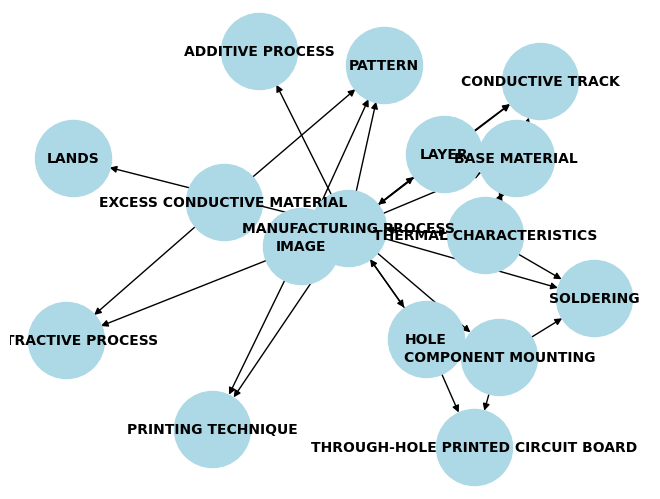

In [30]:
from matplotlib import pyplot as plt
import networkx as nx
def create_graph(data):
    G = nx.DiGraph()

    # Add edges with attributes
    for item in data:
        G.add_edge(item['source'], item['target'], description=item['description'])

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)

    # Draw edge labels
    #edge_labels = {(item['source'], item['target']): item['description'] for item in data}
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.show()

create_graph(res['relationships'])


In [31]:
be = pd.read_parquet(output_path+'create_base_entity_graph.parquet')
be

,level,clustered_graph,embeddings
0,0,"<graphml xmlns=""http://graphml.graphdrawing.or...","{'ADDITIVE PROCESS': [-0.007678163703531027, -..."


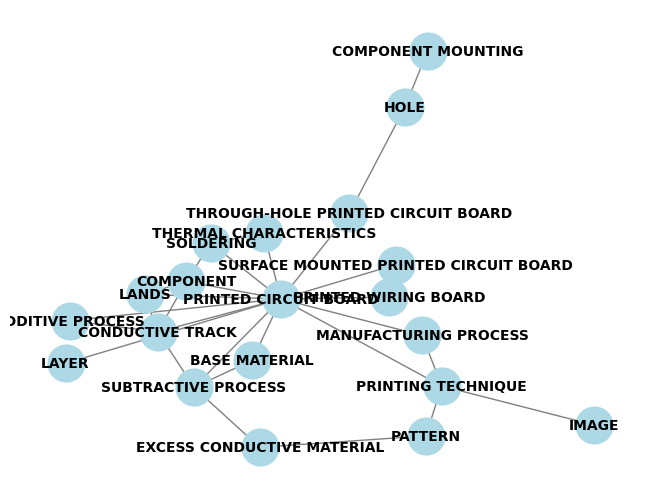

In [32]:
g = nx.read_graphml(output_path+'summarized_graph.graphml')
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')

g

In [33]:
info

{'number of entities': 20,
 'number of classes': 6,
 'classes': type
 PROCESS       6
 TECHNOLOGY    4
 COMPONENT     4
 MATERIAL      3
 DESIGN        2
 PROPERTY      1
 Name: count, dtype: int64,
 'number of relationships': 29,
 'number of relationships outliner': 0,
 'max source_degree': 14,
 'max target_degree': 5,
 'max rank': 19,
 'min rank': 3,
 'source_degree/number of relationships': 8.551724137931034,
 'target_degree/number of relationships': 2.6206896551724137}

In [34]:

#graph = nx.read_graphml(output_path+'clustered_graph.0.graphml')

def get_subgraph_with_descendants(graph, node):
    # Get all descendants of the node (DFS)
    #descendants = list(nx.descendants(graph, node))  # Returns all descendants of the node
    #descendants = list(nx.bfs_successors(graph,'QUALITY',1))
    
    #descendants = descendants[0][1]
    descendants = list(nx.ego_graph(graph,node,1))
    # Include the original node
    descendants.append(node)
    
    # Create the subgraph from the descendants
    subgraph = graph.subgraph(descendants)
    
    return subgraph

subgraph = get_subgraph_with_descendants(g, 'QUALITY')

pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')


NodeNotFound: Source QUALITY is not in G

In [ ]:
descendants = list(nx.bfs_successors(graph,'QUALITY',1))
descendants[0][1]

In [ ]:
path = nx.shortest_path(graph, source='ADDRESSES', target='ALLOY',)
for i in range(len(path) - 1):
    u = path[i]
    v = path[i + 1]
    description = graph[u][v]['description']
    print(f"{u} -> {v}: {description}")